In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pl
import math
import pylab 
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import json

In [91]:
pd.set_option('display.max_columns', None)


In [92]:
df = pd.read_json('train_data.json')

In [112]:
df = df.reset_index(drop = True)
df

,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry In Building,Laundry in Building,Laundry in Unit,Loft,New Construction,No Fee,Outdoor Space,Pre-War,Roof Deck,Swimming Pool,Terrace,Wheelchair Access,bathrooms,bedrooms,building_id,created,description,display_address,features,index,interest_level,latitude,level_0,listing_id,longitude,manager_id,photos,price,street_address,low,medium,high
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],10,medium,40.7145,0,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,0,1,0
1,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",10000,low,40.7947,1,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,1,0,0
2,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,3,a36895b9975c6991ca0fa1d9a99023a1,2016-04-15 05:54:43,"Upper east side ,Flex three bedroom in a doorm...",East 72nd Street,"[Doorman, Elevator, Fitness Center, Laundry in...",122571,low,40.7695,10005,6878679,-73.9603,781c05e464ce94eaa436401d07f2a6cc,[https://photos.renthop.com/2/6878679_b53fe0cc...,5200,200 East 72nd Street,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,1,0,2016-04-26 01:14:31,"Upper West Side, desirable location junior 4, ...",West 82nd Street,[Pre-War],122816,low,40.7845,10104,6923817,-73.9760,096ce7507f4f3678b32780d20bfab49f,[],3995,150 West 82nd Street,1,0,0
4,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1.0,0,62772db889c5fd564f47eb5d46e64e4e,2016-06-02 04:12:07,"Massive Studio Located in the 86st, Very close...",E 86 St.,"[Doorman, Elevator, Laundry in Unit, High Spee...",13249,low,40.7771,11036,7097593,-73.9505,7b392b11d691f65a71e58a3f76aaf04e,[https://photos.renthop.com/2/7097593_b437c54a...,2300,336 E 86 St.,1,0,0
5,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1.0,3,218c3dd4bae5c4f3f03788250336e24d,2016-06-15 06:09:44,Beautiful 3BR in the Washington Heights<br />...,Saint Nicholas Avenue,"[Roof Deck, Elevator, Laundry in Building, Dis...",34962,low,40.8340,20584,7164707,-73.9399,60754f2d2667589daed8c3b116a7dce1,[https://photos.renthop.com/2/7164707_04e20e23...,3100,974 Saint Nicholas Avenue,1,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,1,2385471af68f20a2f405256991d08436,2016-06-12 12:37:26,Sun-Drenched 900 Sf 1 Bedroom 1.5 Bath...,Queens Blvd,[Doorman],34971,low,40.7185,20585,7151223,-73.8367,4c2d70526b6dce48b9785a2dbfd9d5a0,[https://photos.renthop.com/2/7151223_cc54b6d6...,2700,112-01 Queens Blvd,1,0,0
7,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1.0,2,aa88369f320c8d605f1199565cae6a0a,2016-06-22 03:07:33,This renovated gorgeous apartment with spaciou...,W 173 St.,"[Cats Allowed, Dogs Allowed, No Fee, Reduced F...",34973,low,40.8449,20586,7198214,-73.9391,2a4e0d2668fde3afa267d312b3a2a9d8,[https://photos.renthop.com/2/7198214_271c1b24...,1900,629 W 173 St.,1,0,0
8,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,2,94f38b7dcb480311aa04984efd4e0439,2016-06-17 05:38:28,"**Just Listed**Must See**Easy Approval**Sunny,...",East 73rd Street,"[Pre-War, Dishwasher, Hardwood Floors, Dogs Al...",34974,medium,40.7671,20587,7177441,-73.9529,d3b4ad3b4de64390657f4be37935c435,[https://photos.renthop.com/2/7177441_c91ffa4f...,2650,502 East 73rd Street,0,1,0
9,1,1,0,1,1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,0,0,1,1,1,1,2.0,2,20623ec2c6e1962d917680bfd1535d8a,2016-06-08 05:54:08,The building?s dynamic architecture carries th...,West 57th Street,"[Swimming Pool, Roof Deck, Dining Room, Balcon...",34975,low,40.7714,20588,7126546,-73.9929,0577b9cf7d26e41800d814cb7

In [314]:
def medium (df):
    if df['interest_level'] == 'low' :
        return 0
    elif df['interest_level'] == 'medium': return 1
    else: return 0
    
def high (df):
    if df['interest_level'] == 'low' :
        return 0
    elif df['interest_level'] == 'high': return 1
    else: return 0
    
def low (df):
    if df['interest_level'] == 'low' :
        return 1
    else: return 0
    
def twenty (df):
    if "Doorman" in df["features"]: return 1
    else: return 0
    
df['2015'] = df.apply(lambda df: twenty (df), axis = 1)
df['low'] = df.apply(lambda df: low (df), axis = 1)
df['medium'] = df.apply (lambda df: medium (df),axis=1)
df['high'] = df.apply (lambda df: high (df),axis=1)
df

,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry In Building,Laundry in Building,Laundry in Unit,Loft,New Construction,No Fee,Outdoor Space,Pre-War,Roof Deck,Swimming Pool,Terrace,Wheelchair Access,bathrooms,bedrooms,building_id,created,description,display_address,features,index,interest_level,latitude,level_0,listing_id,longitude,manager_id,photos,price,street_address,low,medium,high,sunny,2015
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],10,medium,40.7145,0,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,0,1,0,0,0
1,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",10000,low,40.7947,1,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,1,0,0,0,1
2,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,3,a36895b9975c6991ca0fa1d9a99023a1,2016-04-15 05:54:43,"Upper east side ,Flex three bedroom in a doorm...",East 72nd Street,"[Doorman, Elevator, Fitness Center, Laundry in...",122571,low,40.7695,10005,6878679,-73.9603,781c05e464ce94eaa436401d07f2a6cc,[https://photos.renthop.com/2/6878679_b53fe0cc...,5200,200 East 72nd Street,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,1,0,2016-04-26 01:14:31,"Upper West Side, desirable location junior 4, ...",West 82nd Street,[Pre-War],122816,low,40.7845,10104,6923817,-73.9760,096ce7507f4f3678b32780d20bfab49f,[],3995,150 West 82nd Street,1,0,0,0,0
4,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1.0,0,62772db889c5fd564f47eb5d46e64e4e,2016-06-02 04:12:07,"Massive Studio Located in the 86st, Very close...",E 86 St.,"[Doorman, Elevator, Laundry in Unit, High Spee...",13249,low,40.7771,11036,7097593,-73.9505,7b392b11d691f65a71e58a3f76aaf04e,[https://photos.renthop.com/2/7097593_b437c54a...,2300,336 E 86 St.,1,0,0,1,1
5,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1.0,3,218c3dd4bae5c4f3f03788250336e24d,2016-06-15 06:09:44,Beautiful 3BR in the Washington Heights<br />...,Saint Nicholas Avenue,"[Roof Deck, Elevator, Laundry in Building, Dis...",34962,low,40.8340,20584,7164707,-73.9399,60754f2d2667589daed8c3b116a7dce1,[https://photos.renthop.com/2/7164707_04e20e23...,3100,974 Saint Nicholas Avenue,1,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,1,2385471af68f20a2f405256991d08436,2016-06-12 12:37:26,Sun-Drenched 900 Sf 1 Bedroom 1.5 Bath...,Queens Blvd,[Doorman],34971,low,40.7185,20585,7151223,-73.8367,4c2d70526b6dce48b9785a2dbfd9d5a0,[https://photos.renthop.com/2/7151223_cc54b6d6...,2700,112-01 Queens Blvd,1,0,0,0,1
7,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1.0,2,aa88369f320c8d605f1199565cae6a0a,2016-06-22 03:07:33,This renovated gorgeous apartment with spaciou...,W 173 St.,"[Cats Allowed, Dogs Allowed, No Fee, Reduced F...",34973,low,40.8449,20586,7198214,-73.9391,2a4e0d2668fde3afa267d312b3a2a9d8,[https://photos.renthop.com/2/7198214_271c1b24...,1900,629 W 173 St.,1,0,0,1,0
8,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,2,94f38b7dcb480311aa04984efd4e0439,2016-06-17 05:38:28,"**Just Listed**Must See**Easy Approval**Sunny,...",East 73rd Street,"[Pre-War, Dishwasher, Hardwood Floors, Dogs Al...",34974,medium,40.7671,20587,7177441,-73.9529,d3b4ad3b4de64390657f4be37935c435,[https://photos.renthop.com/2/7177441_c91ffa4f...,2650,502 East 73rd Street,0,1,0,1,0
9,1,1,0,1,1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,0,0,1,1,1,1,2.0,2,20623ec2c6e1962d917680bfd1535d8a,2016-06-08 05:54:08,The building?s dynamic architecture carries th...,West 57th Street,"[Swimming Pool, Roof Deck, Dining Room, Balcon...",34975,low,40.7714,2

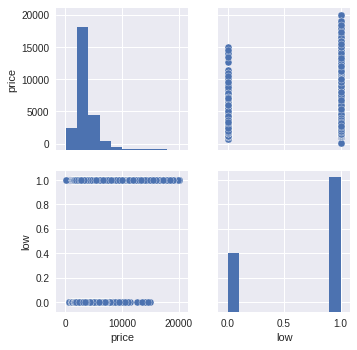

In [165]:
#b
%matplotlib inline
sb.pairplot(df.iloc[:,40:43])


In [211]:
df = df[df.price < 20000]
df = df[df.latitude > 20]
df = df[df.longitude > -100]

In [212]:
df

,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry In Building,Laundry in Building,Laundry in Unit,Loft,New Construction,No Fee,Outdoor Space,Pre-War,Roof Deck,Swimming Pool,Terrace,Wheelchair Access,bathrooms,bedrooms,building_id,created,description,display_address,features,index,interest_level,latitude,level_0,listing_id,longitude,manager_id,photos,price,street_address,low,medium,high,sunny
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],10,medium,40.7145,0,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,0,1,0,0
1,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",10000,low,40.7947,1,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,1,0,0,0
2,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,3,a36895b9975c6991ca0fa1d9a99023a1,2016-04-15 05:54:43,"Upper east side ,Flex three bedroom in a doorm...",East 72nd Street,"[Doorman, Elevator, Fitness Center, Laundry in...",122571,low,40.7695,10005,6878679,-73.9603,781c05e464ce94eaa436401d07f2a6cc,[https://photos.renthop.com/2/6878679_b53fe0cc...,5200,200 East 72nd Street,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,1,0,2016-04-26 01:14:31,"Upper West Side, desirable location junior 4, ...",West 82nd Street,[Pre-War],122816,low,40.7845,10104,6923817,-73.9760,096ce7507f4f3678b32780d20bfab49f,[],3995,150 West 82nd Street,1,0,0,0
4,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1.0,0,62772db889c5fd564f47eb5d46e64e4e,2016-06-02 04:12:07,"Massive Studio Located in the 86st, Very close...",E 86 St.,"[Doorman, Elevator, Laundry in Unit, High Spee...",13249,low,40.7771,11036,7097593,-73.9505,7b392b11d691f65a71e58a3f76aaf04e,[https://photos.renthop.com/2/7097593_b437c54a...,2300,336 E 86 St.,1,0,0,1
5,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1.0,3,218c3dd4bae5c4f3f03788250336e24d,2016-06-15 06:09:44,Beautiful 3BR in the Washington Heights<br />...,Saint Nicholas Avenue,"[Roof Deck, Elevator, Laundry in Building, Dis...",34962,low,40.8340,20584,7164707,-73.9399,60754f2d2667589daed8c3b116a7dce1,[https://photos.renthop.com/2/7164707_04e20e23...,3100,974 Saint Nicholas Avenue,1,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,1,2385471af68f20a2f405256991d08436,2016-06-12 12:37:26,Sun-Drenched 900 Sf 1 Bedroom 1.5 Bath...,Queens Blvd,[Doorman],34971,low,40.7185,20585,7151223,-73.8367,4c2d70526b6dce48b9785a2dbfd9d5a0,[https://photos.renthop.com/2/7151223_cc54b6d6...,2700,112-01 Queens Blvd,1,0,0,0
7,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1.0,2,aa88369f320c8d605f1199565cae6a0a,2016-06-22 03:07:33,This renovated gorgeous apartment with spaciou...,W 173 St.,"[Cats Allowed, Dogs Allowed, No Fee, Reduced F...",34973,low,40.8449,20586,7198214,-73.9391,2a4e0d2668fde3afa267d312b3a2a9d8,[https://photos.renthop.com/2/7198214_271c1b24...,1900,629 W 173 St.,1,0,0,1
8,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,2,94f38b7dcb480311aa04984efd4e0439,2016-06-17 05:38:28,"**Just Listed**Must See**Easy Approval**Sunny,...",East 73rd Street,"[Pre-War, Dishwasher, Hardwood Floors, Dogs Al...",34974,medium,40.7671,20587,7177441,-73.9529,d3b4ad3b4de64390657f4be37935c435,[https://photos.renthop.com/2/7177441_c91ffa4f...,2650,502 East 73rd Street,0,1,0,1
9,1,1,0,1,1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,0,0,1,1,1,1,2.0,2,20623ec2c6e1962d917680bfd1535d8a,2016-06-08 05:54:08,The building?s dynamic architecture carries th...,West 57th Street,"[Swimming Pool, Roof Deck, Dining Room, Balcon...",34975,low,40.7714,20588,7126546,-73.9929,0

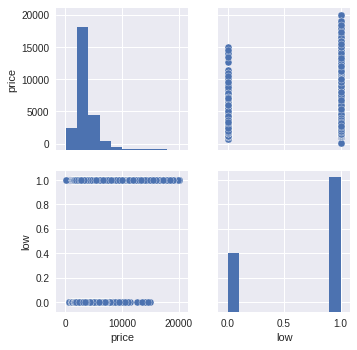

In [213]:
#b
%matplotlib inline
sb.pairplot(df.iloc[:,40:43])


In [370]:
df['binary_sum'] = df['Balcony'] + df['Cats Allowed'] + df['Common Outdoor Space'] + df['Dining Room'] + df['Dishwasher'] + df['Dogs Allowed'] + df['Doorman'] + df['Elevator'] + df['Exclusive'] + df['Fitness Center'] + df['Garden/Patio'] + df['Hardwood Floors'] + df['High Speed Internet'] + df['Laundry In Building'] + df['Laundry in Building'] + df['Laundry in Unit'] + df['Loft'] + df['New Construction'] + df['No Fee'] + df['Outdoor Space'] + df['Pre-War'] + df['Roof Deck'] + df['Swimming Pool'] + df['Terrace'] + df['Wheelchair Access']

In [329]:
df

,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,Garden/Patio,Hardwood Floors,High Speed Internet,Laundry In Building,Laundry in Building,Laundry in Unit,Loft,New Construction,No Fee,Outdoor Space,Pre-War,Roof Deck,Swimming Pool,Terrace,Wheelchair Access,bathrooms,bedrooms,building_id,created,description,display_address,features,index,interest_level,latitude,level_0,listing_id,longitude,manager_id,photos,price,street_address,low,medium,high,sunny,2015,binary_sum
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],10,medium,40.7145,0,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,0,1,0,0,0,0
1,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",10000,low,40.7947,1,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,1,0,0,0,1,5
2,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1.0,3,a36895b9975c6991ca0fa1d9a99023a1,2016-04-15 05:54:43,"Upper east side ,Flex three bedroom in a doorm...",East 72nd Street,"[Doorman, Elevator, Fitness Center, Laundry in...",122571,low,40.7695,10005,6878679,-73.9603,781c05e464ce94eaa436401d07f2a6cc,[https://photos.renthop.com/2/6878679_b53fe0cc...,5200,200 East 72nd Street,1,0,0,0,1,6
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,1,0,2016-04-26 01:14:31,"Upper West Side, desirable location junior 4, ...",West 82nd Street,[Pre-War],122816,low,40.7845,10104,6923817,-73.9760,096ce7507f4f3678b32780d20bfab49f,[],3995,150 West 82nd Street,1,0,0,0,0,1
4,0,1,0,0,1,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1.0,0,62772db889c5fd564f47eb5d46e64e4e,2016-06-02 04:12:07,"Massive Studio Located in the 86st, Very close...",E 86 St.,"[Doorman, Elevator, Laundry in Unit, High Spee...",13249,low,40.7771,11036,7097593,-73.9505,7b392b11d691f65a71e58a3f76aaf04e,[https://photos.renthop.com/2/7097593_b437c54a...,2300,336 E 86 St.,1,0,0,1,1,7
5,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1.0,3,218c3dd4bae5c4f3f03788250336e24d,2016-06-15 06:09:44,Beautiful 3BR in the Washington Heights<br />...,Saint Nicholas Avenue,"[Roof Deck, Elevator, Laundry in Building, Dis...",34962,low,40.8340,20584,7164707,-73.9399,60754f2d2667589daed8c3b116a7dce1,[https://photos.renthop.com/2/7164707_04e20e23...,3100,974 Saint Nicholas Avenue,1,0,0,0,0,7
6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,1,2385471af68f20a2f405256991d08436,2016-06-12 12:37:26,Sun-Drenched 900 Sf 1 Bedroom 1.5 Bath...,Queens Blvd,[Doorman],34971,low,40.7185,20585,7151223,-73.8367,4c2d70526b6dce48b9785a2dbfd9d5a0,[https://photos.renthop.com/2/7151223_cc54b6d6...,2700,112-01 Queens Blvd,1,0,0,0,1,1
7,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1.0,2,aa88369f320c8d605f1199565cae6a0a,2016-06-22 03:07:33,This renovated gorgeous apartment with spaciou...,W 173 St.,"[Cats Allowed, Dogs Allowed, No Fee, Reduced F...",34973,low,40.8449,20586,7198214,-73.9391,2a4e0d2668fde3afa267d312b3a2a9d8,[https://photos.renthop.com/2/7198214_271c1b24...,1900,629 W 173 St.,1,0,0,1,0,5
8,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0,2,94f38b7dcb480311aa04984efd4e0439,2016-06-17 05:38:28,"**Just Listed**Must See**Easy Approval**Sunny,...",East 73rd Street,"[Pre-War, Dishwasher, Hardwood Floors, Dogs Al...",34974,medium,40.7671,20587,7177441,-73.9529,d3b4ad3b4de64390657f4be37935c435,[https://photos.renthop.com/2/7177441_c91ffa4f...,2650,502 East 73rd Street,0,1,0,1,0,5
9,1,1,0,1,1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,0,0,1,1,1,1,2.0,2,20623ec2c6e1962d917680bfd1535d8a,2016-06-08 05:54:08,The building?s dynamic architecture carries th...,West 57th Street,"[Swimming Pool, Roof Deck, Dining Room, B

In [214]:
print(df.describe())

            Balcony  Cats Allowed  Common Outdoor Space   Dining Room  \
count  41796.000000  41796.000000          41796.000000  41796.000000   
mean       0.060819      0.478084              0.026175      0.103263   
std        0.239001      0.499525              0.159657      0.304306   
min        0.000000      0.000000              0.000000      0.000000   
25%        0.000000      0.000000              0.000000      0.000000   
50%        0.000000      0.000000              0.000000      0.000000   
75%        0.000000      1.000000              0.000000      0.000000   
max        1.000000      1.000000              1.000000      1.000000   

         Dishwasher  Dogs Allowed       Doorman      Elevator     Exclusive  \
count  41796.000000  41796.000000  41796.000000  41796.000000  41796.000000   
mean       0.412695      0.447363      0.421428      0.524356      0.044310   
std        0.492325      0.497228      0.493794      0.499412      0.205786   
min        0.000000      0

In [215]:
print(df.corr())

                       Balcony  Cats Allowed  Common Outdoor Space  \
Balcony               1.000000      0.018380             -0.027926   
Cats Allowed          0.018380      1.000000              0.106495   
Common Outdoor Space -0.027926      0.106495              1.000000   
Dining Room           0.242950     -0.024462             -0.043322   
Dishwasher            0.231387     -0.045577             -0.085684   
Dogs Allowed          0.022510      0.936791              0.107472   
Doorman               0.161728      0.091280              0.126239   
Elevator              0.168399      0.034461              0.113835   
Exclusive            -0.041174      0.032025              0.033881   
Fitness Center        0.127375      0.129249              0.196555   
Garden/Patio          0.311132      0.009470             -0.026123   
Hardwood Floors       0.180403     -0.177759             -0.119950   
High Speed Internet   0.143457      0.078326             -0.017744   
Laundry In Building 

In [371]:
df_train_split, df_test_split = train_test_split(df, test_size=0.3, random_state=42)
df_train_split = df_train_split.reset_index(drop = True)
df_test_split = df_test_split.reset_index(drop = True)

In [372]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators = 100, max_depth = 50, oob_score = True)
X = df_train_split[['binary_sum', 'bathrooms', 'bedrooms', 
                    'Balcony', 'Cats Allowed', 'Common Outdoor Space', 'Dining Room', 'Dishwasher',
       'Dogs Allowed', 'Doorman', 'Elevator', 'Exclusive', 'Fitness Center', 'Garden/Patio', 
       'Hardwood Floors', 'High Speed Internet', 'Laundry in Building',
       'Laundry in Unit', 'Loft', 'New Construction', 'No Fee', 'Outdoor Space', 'Pre-War',
       'Roof Deck', 'Swimming Pool', 'Terrace', 'Wheelchair Access',
       'latitude', 'longitude', 'price']].copy()
Y = df_train_split['interest_level']

In [373]:
model1 = clf.fit(X, Y)

In [374]:
X2 = df_test_split[['binary_sum', 'bathrooms', 'bedrooms', 
                    'Balcony', 'Cats Allowed', 'Common Outdoor Space', 'Dining Room', 'Dishwasher',
       'Dogs Allowed', 'Doorman', 'Elevator', 'Exclusive', 'Fitness Center', 'Garden/Patio', 
       'Hardwood Floors', 'High Speed Internet', 'Laundry in Building',
       'Laundry in Unit', 'Loft', 'New Construction', 'No Fee', 'Outdoor Space', 'Pre-War',
       'Roof Deck', 'Swimming Pool', 'Terrace', 'Wheelchair Access',
       'latitude', 'longitude', 'price']].copy()
Y2 = df_test_split['interest_level']

In [375]:
Y2_test = model1.predict(X2)

In [376]:
np.set_printoptions(threshold=np.nan)


In [377]:
t = (Y2_test == Y2).sum()
t

8958

In [378]:
t2 = len(Y2)
t2

12539

In [379]:
t/t2

0.714411037562804

In [318]:
list_of_list = df.features.tolist()

In [319]:
flat_list = [item for sublist in list_of_list for item in sublist]

In [321]:
flat_list = list(set(flat_list))

In [322]:
flat_list

['A One-of-a-Kind Full service Luxury Highrise',
 'A/C Units',
 '** NO FEE MULTI-LEVEL MANSION! * MASSIVE 3BR TRIPLEX * HUGE PRIVATE TERRACE * E50s & PARK AVE * ELEV/LNDRY BLDG **',
 'King Bedrooms',
 'Private terrace',
 'Expansive Sundeck',
 'Available  04/15/16',
 'Gas Stove',
 '** CLASSY CORNER STUDIO SUPREME * WALLS OF WINDOWS * ALL MODERN & NEW * PETS OK **',
 'electronic keycard',
 'renovated kitchen',
 'Cats on approval',
 'Laundry in Unit',
 'Roof/Sundeck',
 'Stainless Steet Appliances',
 'Brand New Renovation',
 'Transport right outside',
 'parking',
 'exclusive rental',
 'no board approval',
 '24 Hour Doorman',
 'Dishwasher/Microwave',
 'indoor swimming pool',
 'Bluetooth System',
 'duplex',
 'Rent is net effective-Gross price is $3250',
 'attended garage and service entrance',
 'near NQRMG Trains',
 'Balcony',
 'live-in super',
 'LIGHT',
 'Gramercy Park',
 'private backyard',
 'Penthouse',
 'COME LIVE THE GOOD LIFE FOR  LESS $$$$',
 'PublicOutdoor',
 'Laundry In Unit',
 'Soa

Manager ID and building ID are non unique
Try adding the binary variables together
index and level_0 are to be ignored